# Train your custom YOLOv5 Visual Inspection model
*Based on and inspired by the  [Yolov5 Tutorials](https://github.com/ultralytics/yolov5/wiki/) by  [Ultralytics](https://ultralytics.com)*

In this notebook we are going to train a custom Yolov5 model for detecting anomalies in images. The data set for this demonstrator is based on the Metal Nut Data Set from mvtec.com

**Metal Nut Data Set**
- Credits to https://www.mvtec.com/company/research/datasets
- See also: https://www.mvtec.com/company/research/datasets/mvtec-ad

**ATTRIBUTION**

Paul Bergmann, Michael Fauser, David Sattlegger, Carsten Steger. MVTec AD - A Comprehensive Real-World Dataset for Unsupervised Anomaly Detection; in: IEEE Conference on Computer Vision and Pattern Recognition (CVPR), June 2019

**LICENSE**

The data is released under the Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License (CC BY-NC-SA 4.0). For using the data in a way that falls under the commercial use clause of the license, please contact us via the form below.

# Setup

Clone GitHub [repository](https://github.com/ultralytics/yolov5), install [dependencies](https://github.com/ultralytics/yolov5/blob/master/requirements.txt) and check PyTorch and GPU.

In [1]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

Cloning into 'yolov5'...
remote: Enumerating objects: 15378, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 15378 (delta 4), reused 0 (delta 0), pack-reused 15368
Receiving objects: 100% (15378/15378), 14.34 MiB | 25.02 MiB/s, done.
Resolving deltas: 100% (10516/10516), done.
/content/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 4.9 MB/s eta 0:00:00


In [2]:
import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-134-g23c4923 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.3/78.2 GB disk)


In case you run into  `ImportError: libGL.so.1: cannot open shared object file: No such file or directory`, please try `pip install opencv-python-headless`

# Test the setup 

`detect.py` runs YOLOv5 inference on a variety of sources, downloading models automatically from the [latest YOLOv5 release](https://github.com/ultralytics/yolov5/releases), and saving results to `runs/detect`. Example inference sources are:

```shell
python detect.py --source 0  # webcam
                          img.jpg  # image 
                          vid.mp4  # video
                          screen  # screenshot
                          path/  # directory
                         'path/*.jpg'  # glob
                         'https://youtu.be/Zgi9g1ksQHc'  # YouTube
                         'rtsp://example.com/media.mp4'  # RTSP, RTMP, HTTP stream
```

detect: weights=['yolov5s.pt'], source=data/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-134-g23c4923 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

100% 14.1M/14.1M [00:00<00:00, 17.3MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
image 1/2 /content/yolov5/data/images/bus.jpg: 640x480 4 persons, 1 bus, 38.8ms
image 2/2 /content/yolov5/data/images/zidane.jpg: 384x640 2 persons, 2 ties, 40.6ms
Speed: 0.5ms pre-process, 39.7ms inference, 132.3ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp


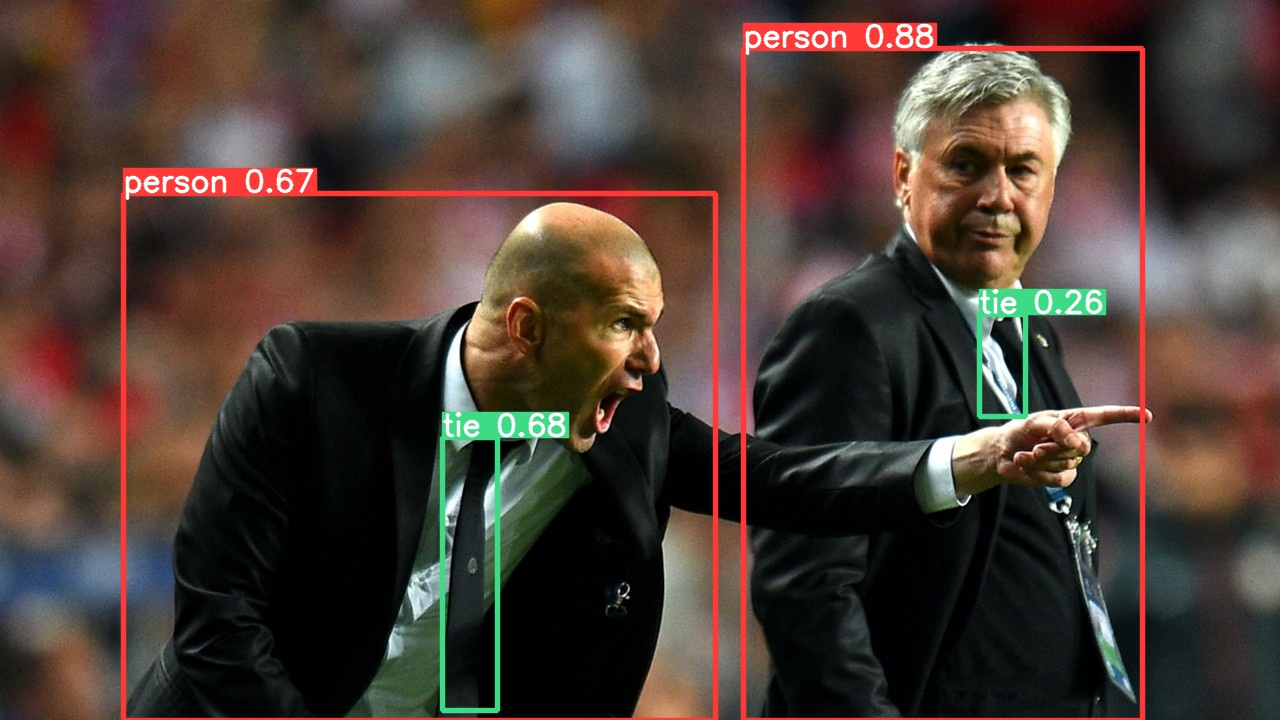

In [3]:
!python detect.py --weights yolov5s.pt --img 640 --conf 0.25 --source data/images
display.Image(filename='runs/detect/exp/zidane.jpg', width=600)

# Unpack and move the training data


In [5]:
# Unzip the images and annoations
!mkdir -p data/manuela
!unzip   -o  ../data.zip -d data/manuela
!ls -l data/manuela/data


total 20
-rw-r--r-- 1 root root  111 Apr  7 12:13 data.yaml
-rw-r--r-- 1 root root  659 Apr  7 12:17 README.txt
drwxr-xr-x 4 root root 4096 Apr  7 12:13 test
drwxr-xr-x 4 root root 4096 Apr  7 12:13 train
drwxr-xr-x 4 root root 4096 Apr  7 12:13 valid


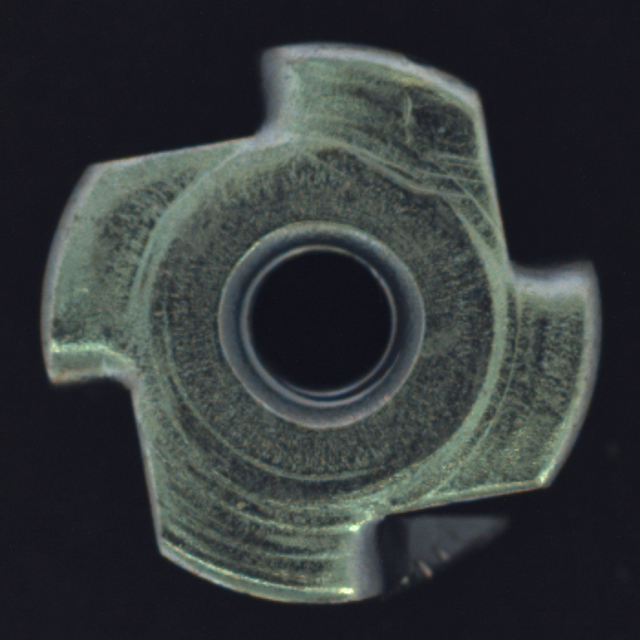

In [6]:
# View image 
display.Image(filename='data/manuela/data/metal-nut-data/valid/images/bent-000.png', width=600)

In [7]:
# Show annotation
!cat data/manuela/data/metal-nut-data/valid/labels/bent-000.txt

1 0.6871428571428572 0.8671428571428571 0.2 0.12


In [8]:
# Train YOLOv5s on Metal Nuts for 3 epochs
#%load_ext tensorboard
#%tensorboard --logdir runs/train
!python train.py --img 640 --batch 16 --epochs 600 --data data/metal-nut-data/data.yaml --weights yolov5m.pt --cache

2023-04-08 12:43:30.802527: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-08 12:43:32.169485: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
train: weights=yolov5m.pt, cfg=, data=data/metal-nut-data/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=600, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_datase

In [8]:
!pwd

/content/yolov5/yolov5


# Test model

In [24]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 640 --conf 0.25 --source data/metal-nut-data/valid/images/bent-000.png


detect: weights=['runs/train/exp/weights/best.pt'], source=data/metal-nut-data/valid/images/bent-000.png, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-134-g23c4923 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 212 layers, 20856975 parameters, 0 gradients, 47.9 GFLOPs
image 1/1 /content/yolov5/data/metal-nut-data/valid/images/bent-000.png: 640x640 2 bents, 27.0ms
Speed: 0.7ms pre-process, 27.0ms inference, 84.4ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp6


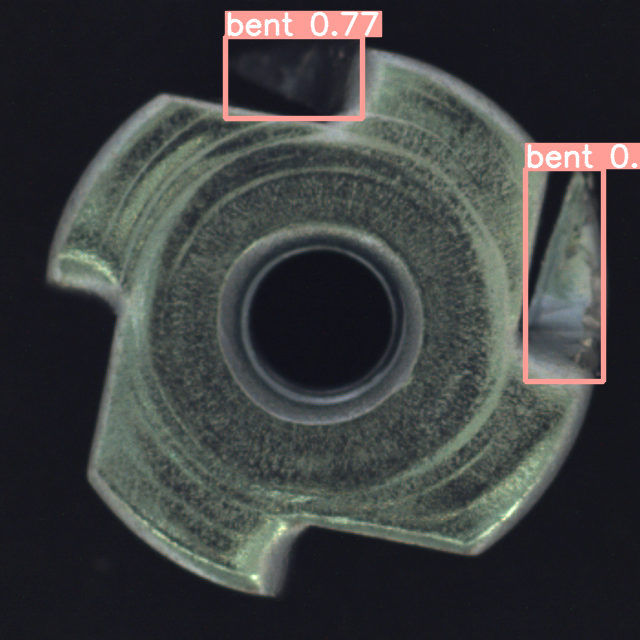

In [25]:
display.Image(filename='runs/detect/exp6/bent-000.png', width=600)

In [26]:
cat data/metal-nut-data/valid/labels/bent-000.txt

1 0.8842857142857142 0.425 0.13714285714285715 0.33285714285714285
1 0.46 0.11857142857142858 0.22 0.13142857142857142


# Export YoloV5 model to ONNX format
Source: [01-yolov5_to_onnx.ipynb](https://github.com/rh-aiservices-bu/yolov5-model-serving/blob/main/01-yolov5_to_onnx.ipynb)
* Eventually modify the image size if you selected  a model with the "6" suffix, as image size is 1280 (and not 640)
* Stay at opset 16 for the moment for OpenVino model server compatibility


In [27]:
!python export.py --weights runs/train/exp/weights/best.pt --include onnx --imgsz 640 --opset 16

export: data=data/coco128.yaml, weights=['runs/train/exp/weights/best.pt'], imgsz=[640], batch_size=1, device=cpu, half=False, inplace=False, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=16, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['onnx']
YOLOv5 🚀 v7.0-134-g23c4923 Python-3.9.16 torch-2.0.0+cu118 CPU

Fusing layers... 
Model summary: 212 layers, 20856975 parameters, 0 gradients, 47.9 GFLOPs

PyTorch: starting from runs/train/exp/weights/best.pt with output shape (1, 25200, 7) (40.3 MB)
requirements: YOLOv5 requirement "onnx>=1.12.0" not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 68.7 MB/s eta 0:00:00

requirements: 1 package updated per ['onnx>=1.12.0']
requirements: ⚠️ Restart runtime or rerun command for updates t

# Save work into tar file for download

In [28]:
!tar -czvf manu-vi-yolo5-run.tar.gz runs/

runs/
runs/detect/
runs/detect/exp2/
runs/detect/exp2/bent-002.png
runs/detect/exp/
runs/detect/exp/bent-001.png
runs/detect/exp5/
runs/detect/exp5/scratch-001.png
runs/detect/exp4/
runs/detect/exp4/scratch-000.png
runs/detect/exp3/
runs/detect/exp6/
runs/detect/exp6/bent-000.png
runs/train/
runs/train/exp/
runs/train/exp/train_batch2.jpg
runs/train/exp/train_batch0.jpg
runs/train/exp/labels.jpg
runs/train/exp/train_batch1.jpg
runs/train/exp/R_curve.png
runs/train/exp/PR_curve.png
runs/train/exp/F1_curve.png
runs/train/exp/results.csv
runs/train/exp/val_batch0_labels.jpg
runs/train/exp/P_curve.png
runs/train/exp/confusion_matrix.png
runs/train/exp/opt.yaml
runs/train/exp/hyp.yaml
runs/train/exp/labels_correlogram.jpg
runs/train/exp/events.out.tfevents.1680957814.8519c2bd1d4d.1194.0
runs/train/exp/results.png
runs/train/exp/weights/
runs/train/exp/weights/last.pt
runs/train/exp/weights/best.onnx
runs/train/exp/weights/best.pt
runs/train/exp/val_batch0_pred.jpg
